<a href="https://colab.research.google.com/github/DANU011/practice-analysis/blob/main/bigdata/bigdata_chap6_MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 다중 회귀(MultipleRegression)
### 1. 개념
다중 회귀분석은 다중의 독립변수가 있는 회귀분석을 말함. 여러 개의 독립변수가 복합적으로 종석 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 표현할 수 있음.

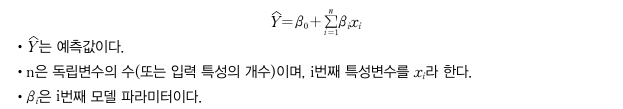

다중 회귀 모델은 변수 Y에 원인이 되는 변수가 여러 개(n) 포함되는 형태. 다중 회귀에서는 최적모델을 결정하기 위해서 다양한 방법으로 변수를 선택. 또한 모델이 복잡해지면 과대적합이 발생할 가능성이 있어 이를 방지하고자 다양한 규제를 적용해 모델의 가중치를 제한.

### (1) 변수선택법
다중 선형 모델의 성능을 높이기 위해 독립변수의 부분집합을 선택하는 방법이 있음. 변수선택법은 모델의 정합도를 개선하는 방식으로서 전진선택법과 후진선택법 등이 있음.  

① 규제가 있는 다항 회귀 모델  
변수선택법의 대안으로 계수추정치를 제한하거나 규칙화하는 기법으로 p개의 독립변수를 모두 포함하는 모델을 적합할 수 있음. 규칙에 따라 계수 추정치들을 0으로 수축하는 방식으로 다중 회귀 모델의 성능을 높임. 회귀계수들은 0으로 수축하기 위한 방식으로 가장 잘 알려진 것은 릿지(Ridge)와 라쏘(Lasso)임. 이 두 가지의 절충안인 엘라스틱넷(Elastic Net)도 있음.  
 - ⓐ 릿지(Lidge)
   - 개념
   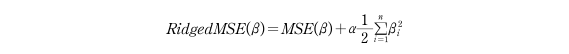
   수축 패널티는 $RidgedMSE$에서 두번째 항이다. 이 항은 β₁, ..., βₙ이 0에 가까울 때 작기 때문에 βᵢ의 추정치를 0으로 수축하는 효과를 줌. 이 규제항은 데이터를 학습하는 동안에만 베용 함수에 추가되며 모델의 학습이 끝나면 수축 패널티의 규제가 없는 성능 지표로 모델의 예측성능을 평가함. 수축 패널티의 α = 0이면 패널티의 영향이 없어 릿지 회귀는 선형 회귀와 같아진다. α가  커질수록 수축 패널티의 영향이 커져 릿지 회귀계수 추정치는 0에 가까워지므로 데이터의 평균을 지나는 선을 만듦. 릿지 회귀가 최소제곱법보다 나은 이유는 편향 - 분산 절충(bias-variance trade-off) 관점에서 볼 수 있음. α가 증가하면 릿지 회귀 적합의 유연성이 줄어들어 편향은 증가하지만 분산은 감소. 그러므로 학습데이터의 작은 변화에 회귀계수 추정치가 크게 변하는 문제를 극복할 수 있음. 또한 릿지는 2ᴾ개의 모델을 탐색해야 하는 변수선택법에 비해 계산이 빠르다는 장점이 있음.
   - scikit-learn의 Ridge
     - 매개변수
       - alpha float(default = 1.0) : 정규화 강도를 정하는 값. 양수의 부동 소수점이여야 함. 알파값이 클수록 정규화의 강도가 세짐.
       - fit_intercept bool(default = True) : 선형 회귀 모델에 대한 절편을 계산할지 여부를 결정. False로 설정하면 절편을 사용하지 않는 모델로 계산. 즉, 데이터가 원점을 지나 중앙에 위치할 것으로 예상.
       - normalize bool(default = False) : True인 경우 X는 평균을 빼고 L2-norm으로 나누어 회귀 전에 정규화됨. False인 경우 해당 정규화를 하지 않음. 표준화를 진행하고 싶으면, normalize = False로 설정한 뒤 fit()을 호출하기 전에 StandardScaler()를 사용하면 됨.
       - positive bool(default = False) : True로 하면 계수가 양수가 됨.
       - copy_X bool(default = True) : True이면 X가 복사됨. False이면 덮어씀.
     - 속성
       - coef_ (n_features,) 또는 (n_targets, n_features)의 array 형태 : 선형 회귀 문제에 대한 추정된 계수. 대상이 두 개 이상이면 2차원 배열 (n_targets, n_features)이고, 대상이 하나이면 길이가 n_features인 1차원 배열.
       - intercept_ float 또는 (n_targets,)의 array 형태 : 선형 모델의 독립항(절편)
     - 메서드 대괄호 [ ] 안의 인자는 생략 가능
       - fit(X, y[, sample_weight])
         - 모델을 학습.
         - 매개변수 설명
           - X : 학습데이터, 2차원 array 형태로 입력
           - Y : 타깃데이터, (n_samples,) 또는 (n_samples, n_targets) 형태로 입력
           - sample_weight : 개별 데이터에 대한 가중치
         - 반환값 : 선형 회귀 모델 추정기를 Object로 반환.
       - get_params([deep])
         - 선형 회귀 모델의 매개변수를 가져옴.
         - 매개변수 설명
           - deep : bool 형태로 입력, default = True
         - 반환값 : 값에 매칭되는 파라미터의 이름을 딕셔너리 형태로 반환
       - predict(X)
         - 선형 모델을 사용해 예측.
         - 매개변수 설명
           - X : 데이터 샘플
         - 반환값 : 예측값을 array로 반환
       - score(X, y[, sample_weight])
         - 예측의 결정계수를 반환.
         - 매개변수 설명
           - X : 테스트 샘픔을 array로 입력
           - y : X의 실제값
           - sample_weight : 개별 데이터에 대한 가중치
         - 반환값 : 결정계수를 float으로 반환

In [10]:
# scikit-learn의 당뇨 데이터를 통한 릿지 회귀 수행
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
x = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
y = diabetes.target

In [11]:
# α값 설정
from sklearn.linear_model import Ridge
import numpy as np

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha) :
  ridge = Ridge(alpha = a, random_state = 45)
  ridge.fit(x, y)
  data.append(pd.Series(np.hstack([ridge.coef_])))

# RidgeMSE의 α값에 따라 다르게 설정되는 릿지 회귀계수를 데이터 프레임에 저장하고 출력
df_ridge = pd.DataFrame(data, index = alpha)
df_ridge.columns = x.columns
df_ridge

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-9.549162,-239.086958,520.369375,323.822745,-712.322159,413.379125,65.811323,167.513007,720.939924,68.123360
0.010,-7.197534,-234.549764,520.588601,320.517131,-380.607135,150.484671,-78.589275,130.312521,592.347959,71.134844
0.100,1.308705,-207.192418,489.695171,301.764058,-83.466034,-70.826832,-188.678898,115.712136,443.812917,86.749315
1.000,29.466112,-83.154276,306.352680,201.627734,5.909614,-29.515495,-152.040280,117.311732,262.944290,111.878956
10.000,19.812842,-0.918430,75.416214,55.025160,19.924621,13.948715,-47.553816,48.259433,70.143948,44.213892


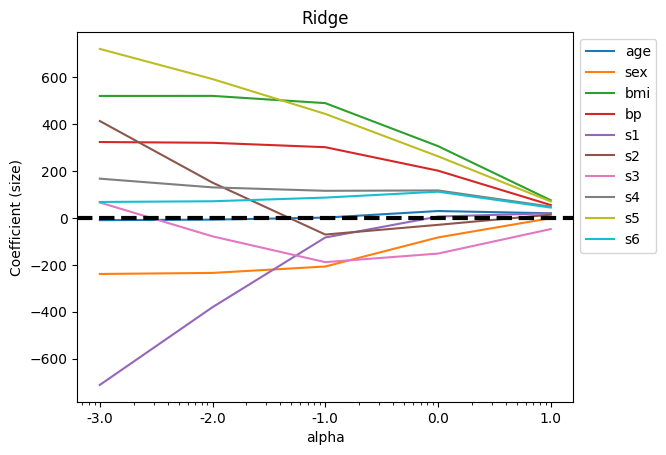

In [12]:
# 시각화
import matplotlib.pyplot as plt

plt.semilogx(df_ridge)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ridge.columns, bbox_to_anchor = (1, 1))
plt.title('Ridge')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3)

In [13]:
# α가 증가하면서 회귀계수의 값이 점점 0에 수렴.

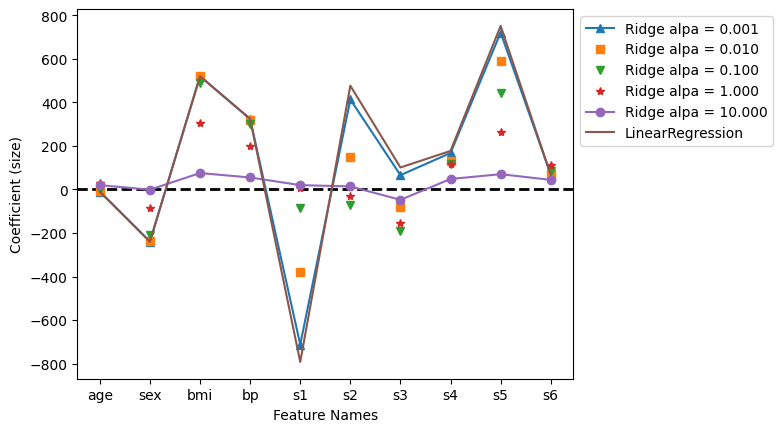

In [14]:
# MSE를 사용한 회귀모델과 비교

# MSE를 사용한 회귀 모델은 α = 0일 때와 같은 효과를 지님.
# α가 작은 릿지 회귀 모델의 회귀계수는 MSE를 사용한 회귀 모델의 계수와 비슷한 사이즈를 지님.
# α값이 점점 증가하면서 회귀계수가 0에 가까워지는 것을 확인할 수 있음.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x, y)

plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 2)
plt.plot(df_ridge.loc[0.001], '^-', label = 'Ridge alpa = 0.001')
plt.plot(df_ridge.loc[0.010], 's', label = 'Ridge alpa = 0.010')
plt.plot(df_ridge.loc[0.100], 'v', label = 'Ridge alpa = 0.100')
plt.plot(df_ridge.loc[1.000], '*', label = 'Ridge alpa = 1.000')
plt.plot(df_ridge.loc[10.000], 'o-', label = 'Ridge alpa = 10.000')

plt.plot(lr.coef_, label = 'LinearRegression')
plt.xlabel('Feature Names')
plt.ylabel('Coefficient (size)')
plt.legend(bbox_to_anchor = (1, 1))

 - ⓑ 라쏘(Lasso)
   - 개념  
     릿지 회귀는 최종 모델에 p개의 변수를 모두 포함. RidgeMSE의 수축 패널티 항은 모든 계수를 0으로 수려시키지만 어떤 것도 0으로 만들지는 않음. 만약에 변수의 크기(p)가 매우 큰 데이터로 릿지 모델을 실행시킨다면, 결과를 해석하는 데 어려움이 발생할 가능성이 있음. 릿지 회귀의 이러한 문제점을 해결하기 위해 라쏘 회귀가 사용됨. 라쏘 회귀는 최소제곱 적합식의 수축 패널티라 불리는 항에 L1 패널티를 추가한 것.
     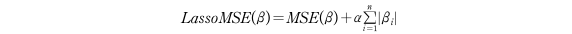
     수축 패널티는 LassoMSE에서 두번째 항임. 이 항은 β₁, ..., βₙ이 0에 가깡ㄹ 때 작기 때문에 βᵢ의 추정치를 0으로 수축하는 효과를 줌. 다만 L1 패널티는 하이퍼파라미터 α가 충분히 클 때, 계수 추정치들의 일부를 0이 되게 할 수 있음. 덜 중요한 특징은 특성의 가중치를 제거할 수 있다는 점에서 릿지 회귀와 차이를 보임. 즉, 라쏘 회귀는 회소 모델(sparse model)을 만들 수 있음.
   - 매개변수, 속성, 메서드는 Ridge와 같음.



In [15]:
# Lasso 모델 생성 및 데이터 학습
from sklearn.linear_model import Lasso

alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha) :
  lasso = Lasso(alpha = a, random_state = 45)
  lasso.fit(x, y)
  data.append(pd.Series(np.hstack([lasso.coef_])))

In [16]:
# 라쏘 회귀계수를 데이터프레임에 저장 및 출력
# 라쏘 회귀계수는 LassoMSE의 α값에 따라 다르게 설정됨.
df_lasso = pd.DataFrame(data, index = alpha)
df_lasso.columns = x.columns
df_lasso

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0.001,-8.996177,-238.896328,520.267403,323.423596,-720.244828,421.399753,66.733503,164.448022,725.335558,67.476810
0.010,-1.304662,-228.819129,525.566130,316.168834,-307.016211,89.324647,-105.078369,119.597616,571.330356,65.008383
0.100,-0.000000,-155.359976,517.186795,275.077235,-52.539365,-0.000000,-210.157991,0.000000,483.912648,33.673965
1.000,0.000000,-0.000000,367.703860,6.298858,0.000000,0.000000,-0.000000,0.000000,307.605418,0.000000
10.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


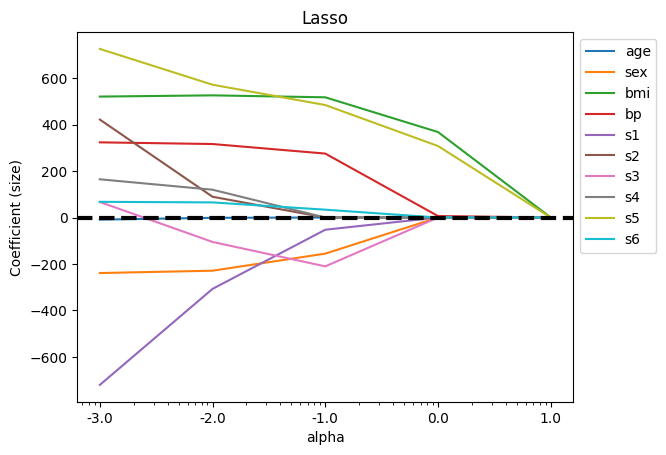

In [17]:
# 시각화
plt.semilogx(df_lasso)
plt.xticks(alpha, labels = np.log10(alpha))
plt.legend(labels = df_ridge.columns, bbox_to_anchor = (1, 1))
plt.title('Lasso')
plt.xlabel('alpha')
plt.ylabel('Coefficient (size)')
plt.axhline(y = 0, linestyle = '--', color = 'black', linewidth = 3)

In [ ]:
# α가 증가하면서 회귀계수의 값이 점점 0이 됨.